<a href="https://colab.research.google.com/github/Sushilchankapure/Sushilchankapure/blob/main/Thyroid_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Check if the file exists
import os
if os.path.isfile('Thyroid_Diff.csv'):
    # Read the CSV file
    df = pd.read_csv('Thyroid_Diff.csv')
else:
    # Provide the full path to the file
    df = pd.read_csv('/path/to/Thyroid_Diff.csv')

# Check if the variable has been overwritten
if 'Thyroid_Diff' in globals():
    # Rename the variable
    df = globals()['Thyroid_Diff']
else:
    # Read the CSV file
    df = pd.read_csv('Thyroid_Diff.csv')

In [7]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [8]:
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [9]:
df.shape

(383, 17)

In [10]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [11]:
df.duplicated().sum()

19

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [15]:
df.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


In [16]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [17]:
object_columns = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function',
                  'Physical Examination','Adenopathy','Pathology','Focality',
                  'Risk','T','N','M','Stage','Response']

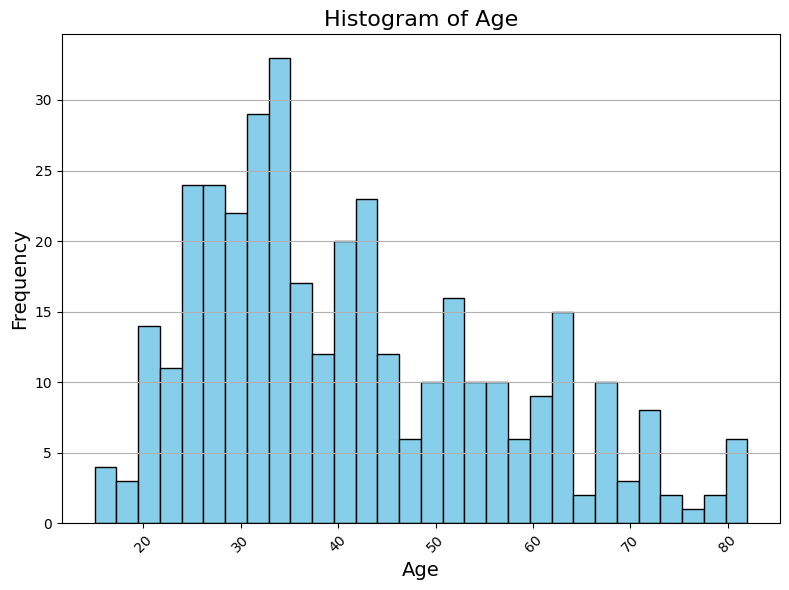

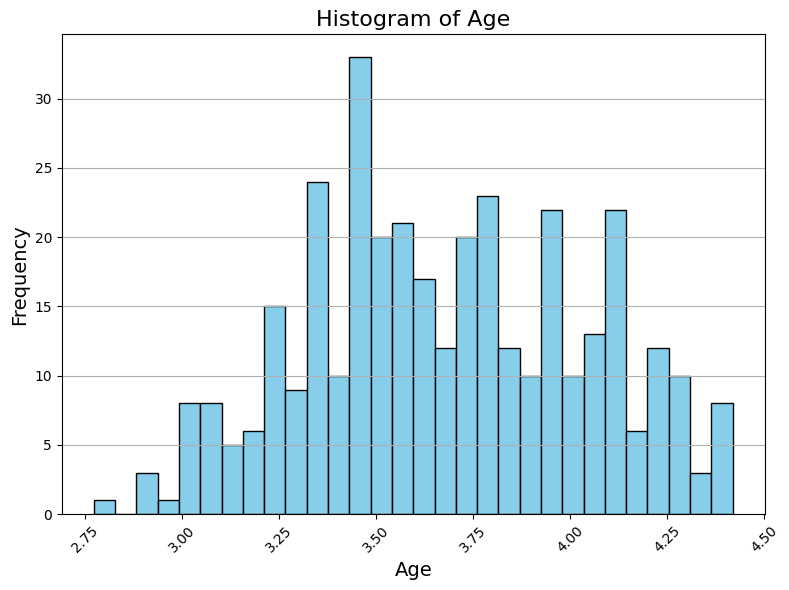

In [18]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=30,color='skyblue',edgecolor='black')
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df['Age_log'] = np.log(df['Age'] + 1)
plt.figure(figsize=(8,6))
plt.hist(df['Age_log'], bins=30, color='skyblue',edgecolor='black')
plt.title(f'Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

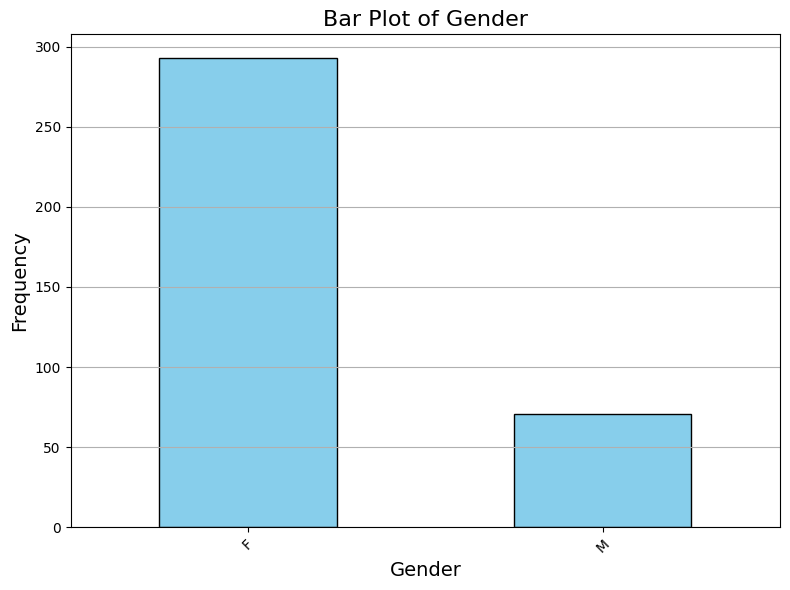

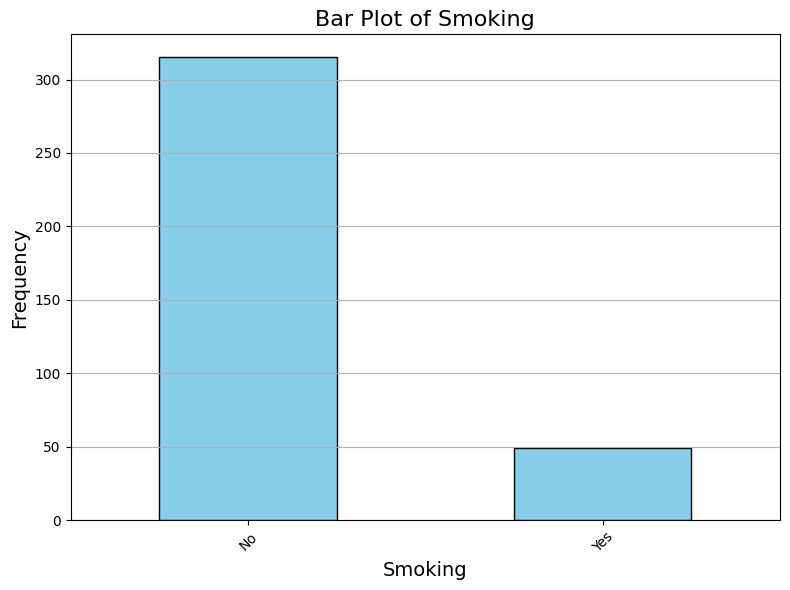

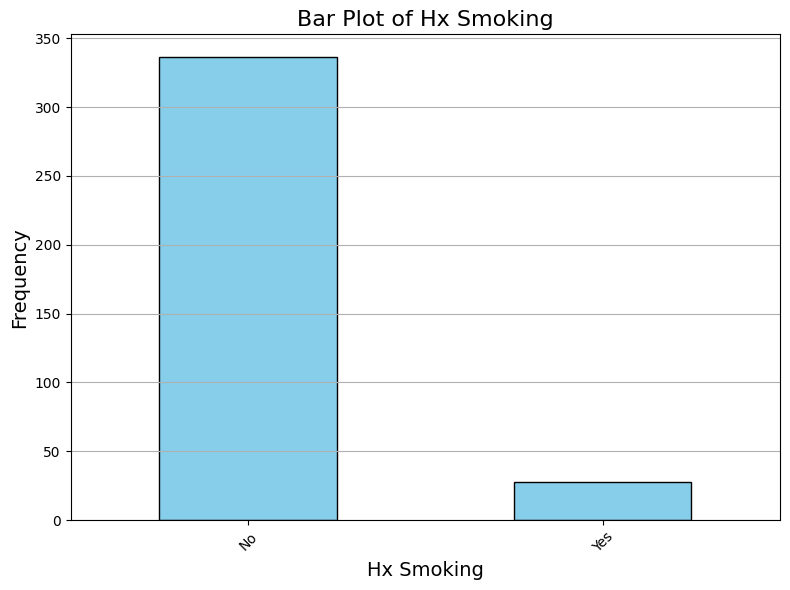

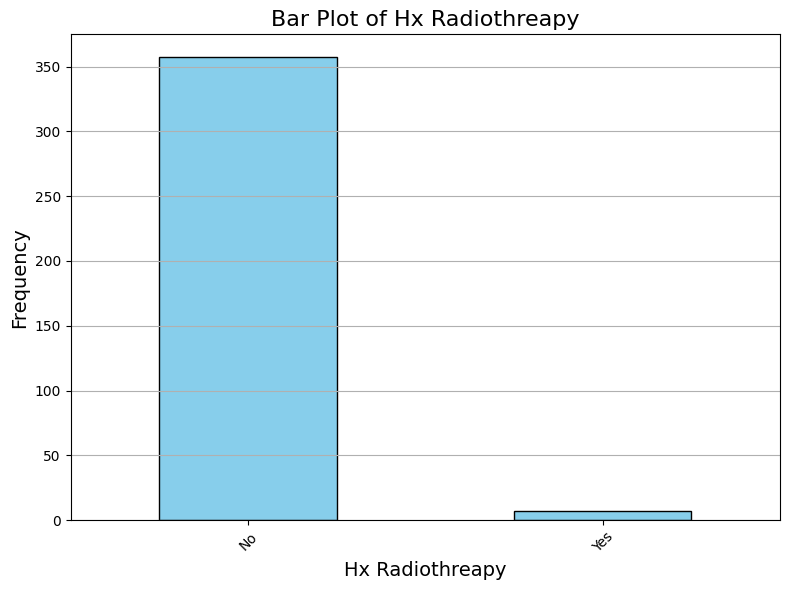

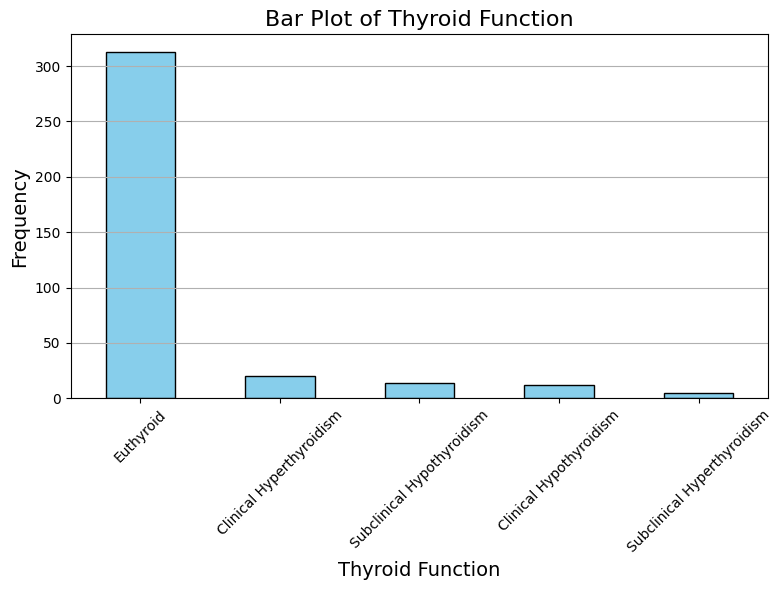

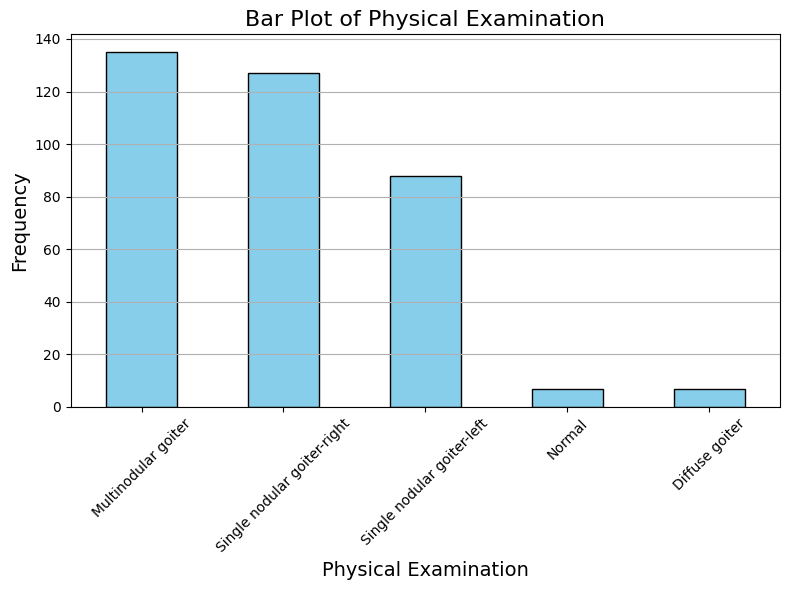

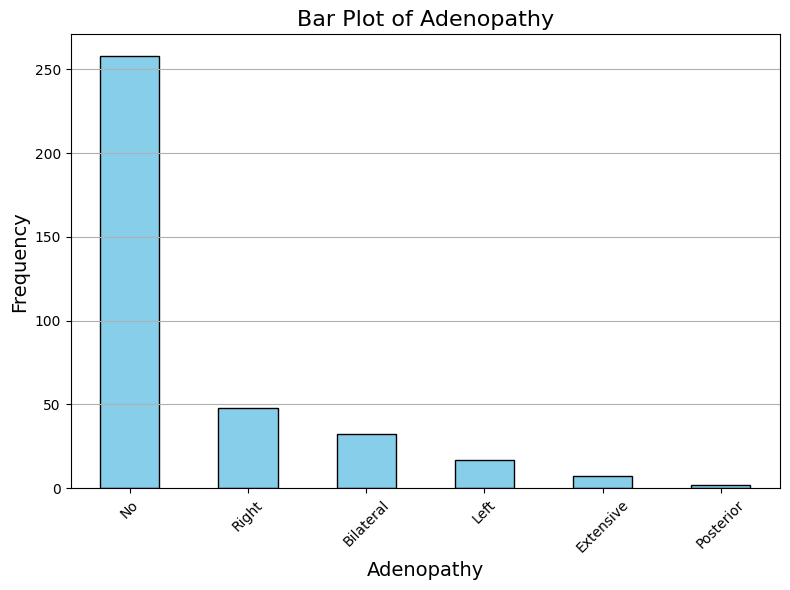

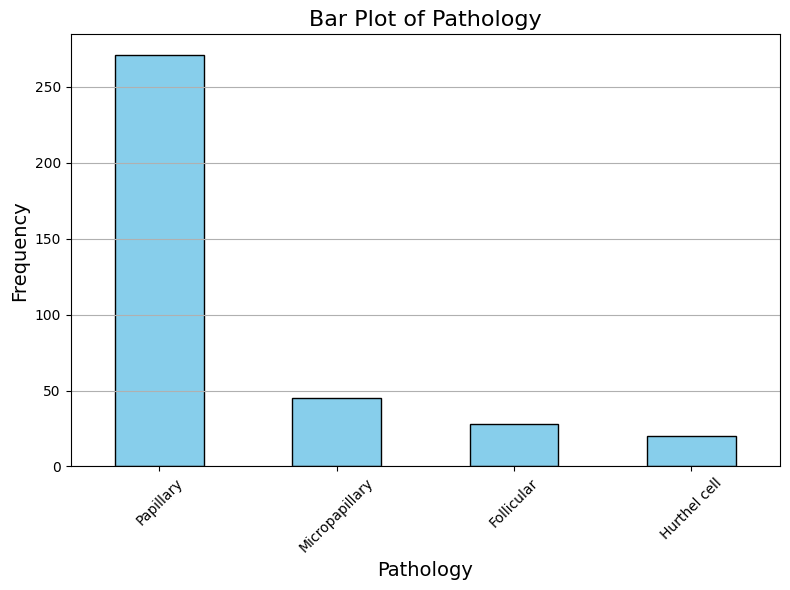

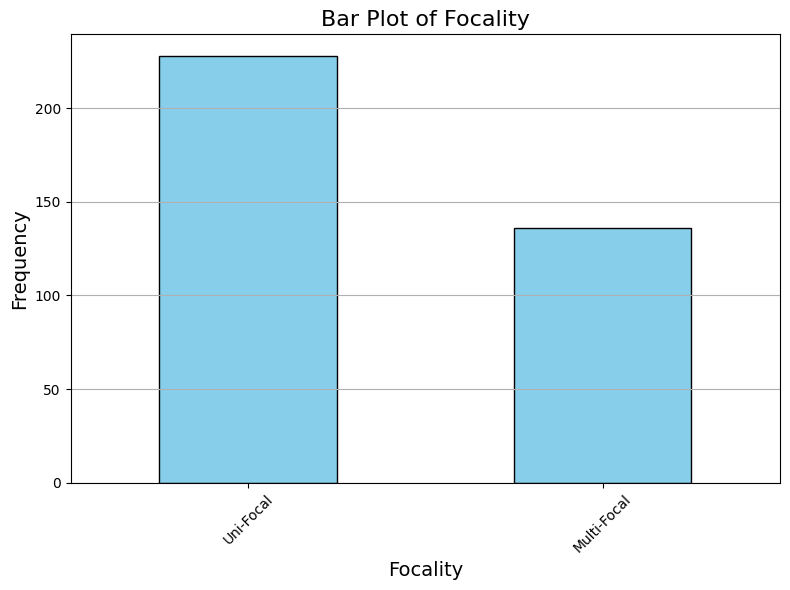

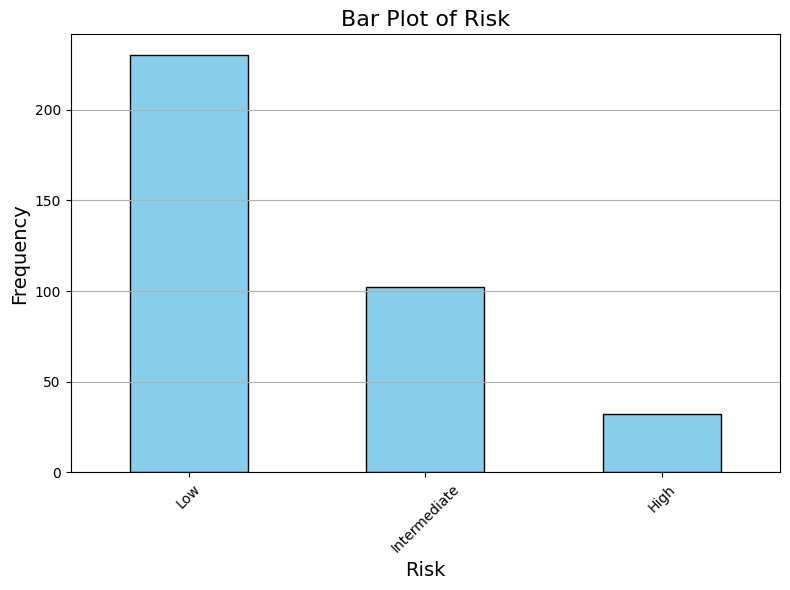

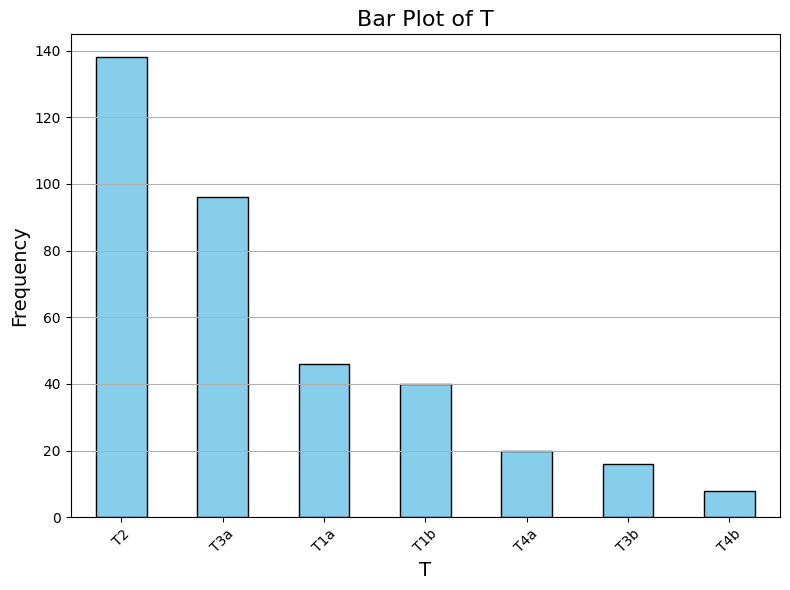

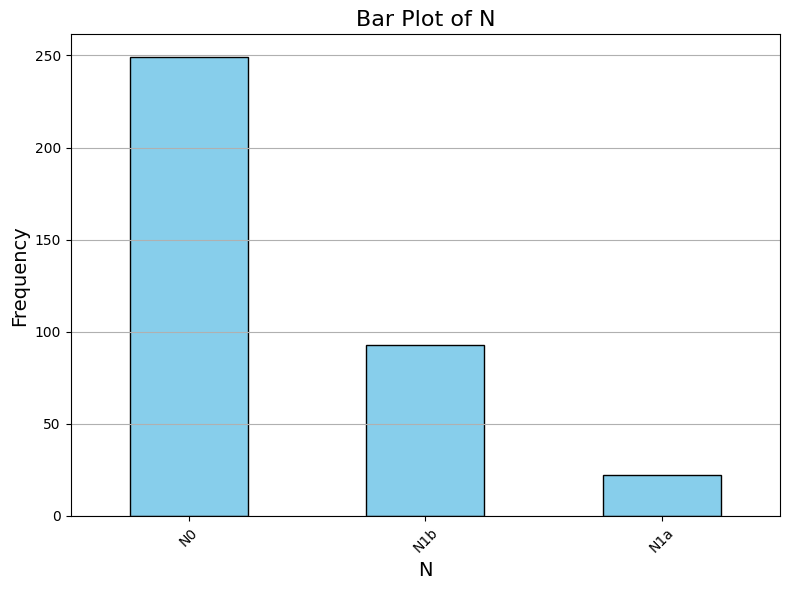

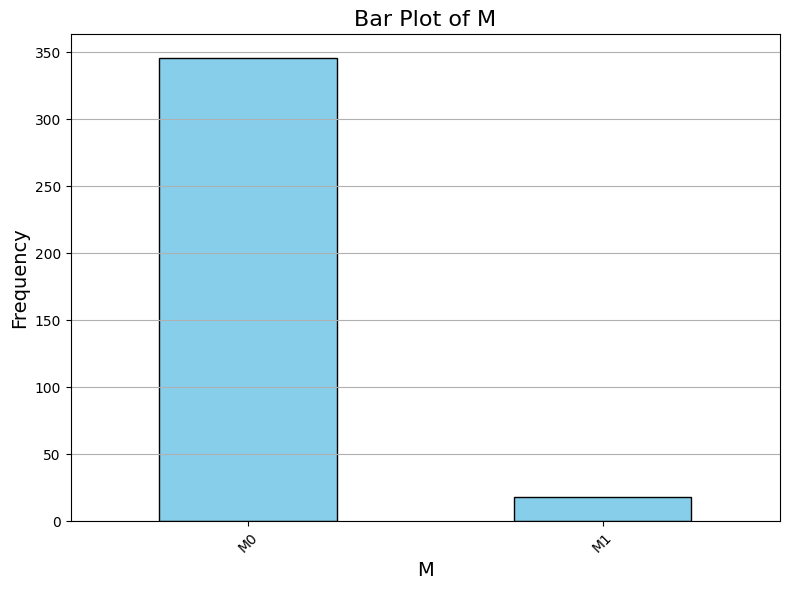

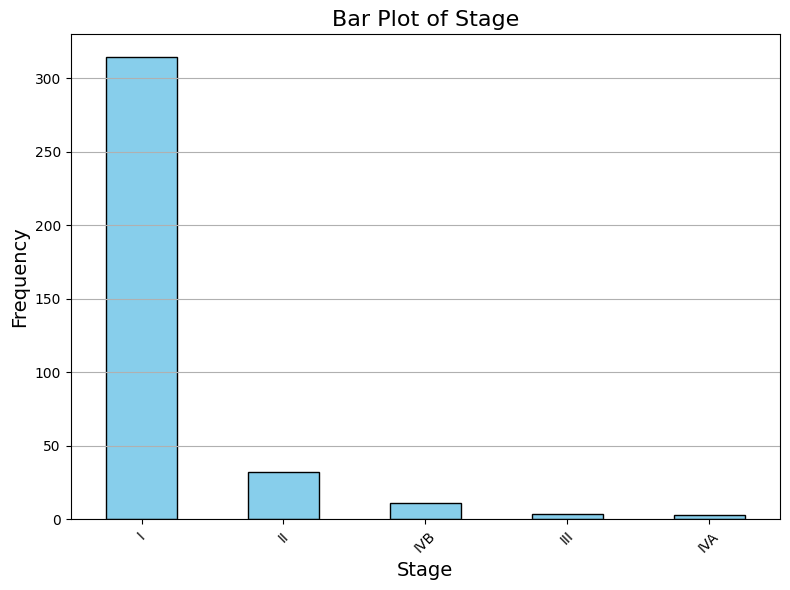

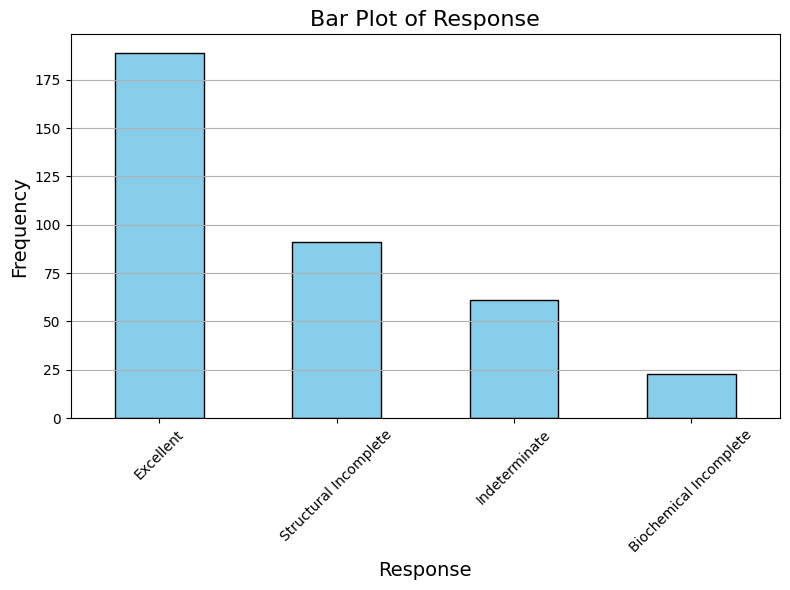

In [19]:
for column in object_columns:
  plt.figure(figsize=(8,6))
  df[column].value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
  plt.title(f'Bar Plot of {column}', fontsize=16)
  plt.xlabel(column, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(axis='y')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

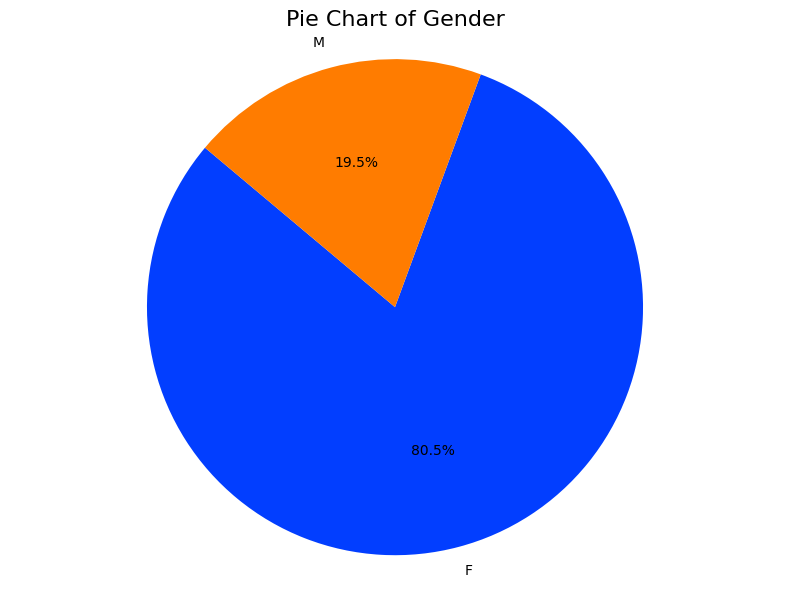

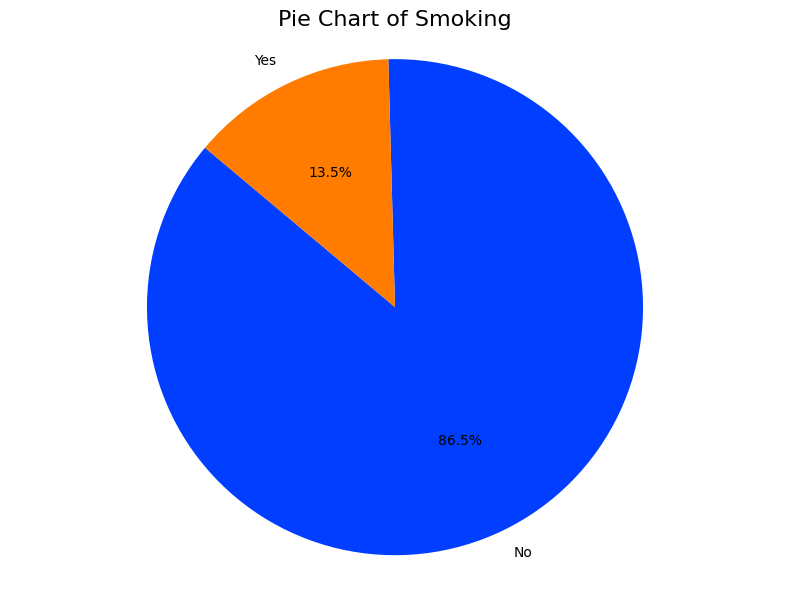

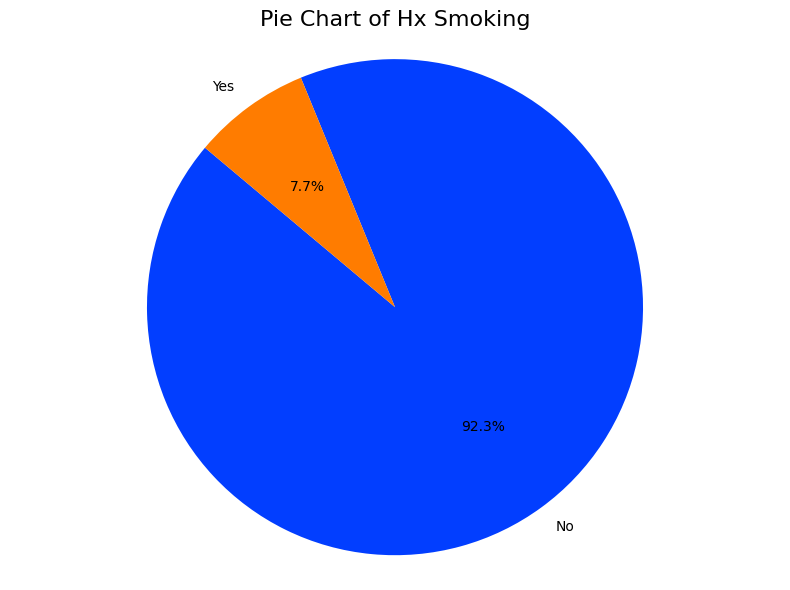

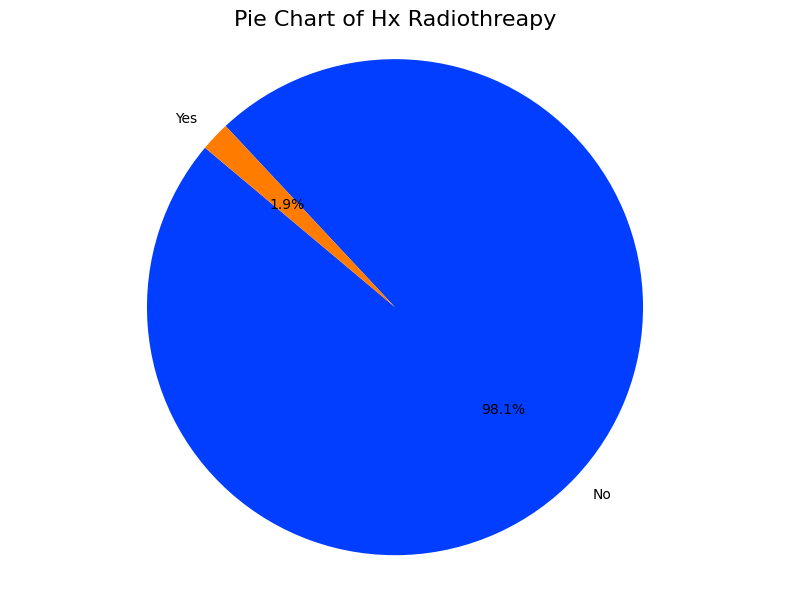

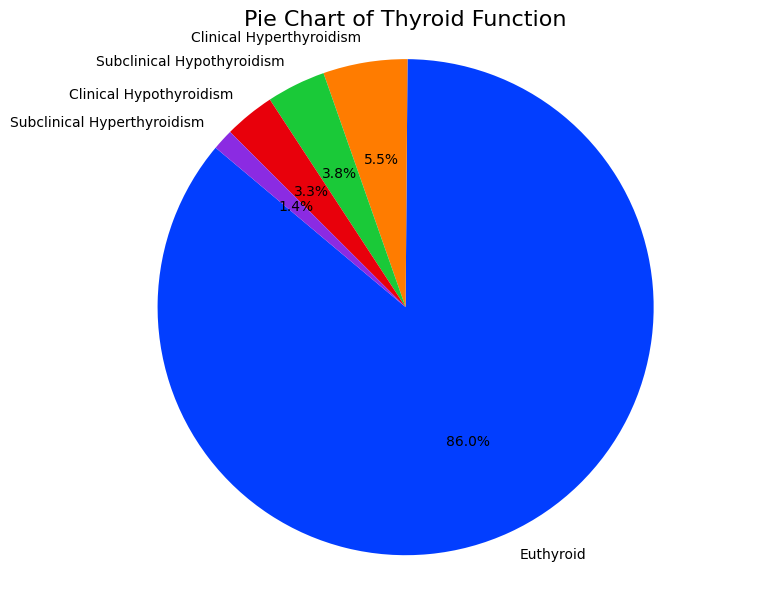

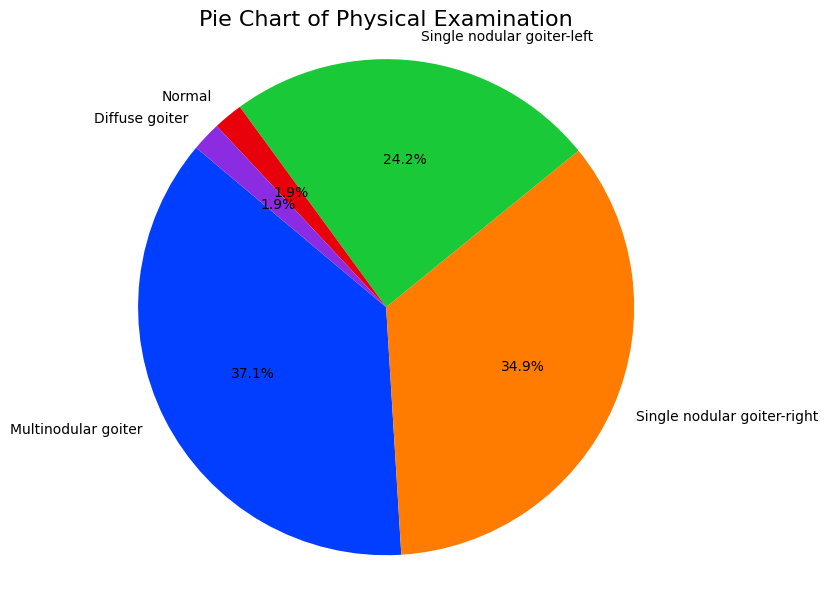

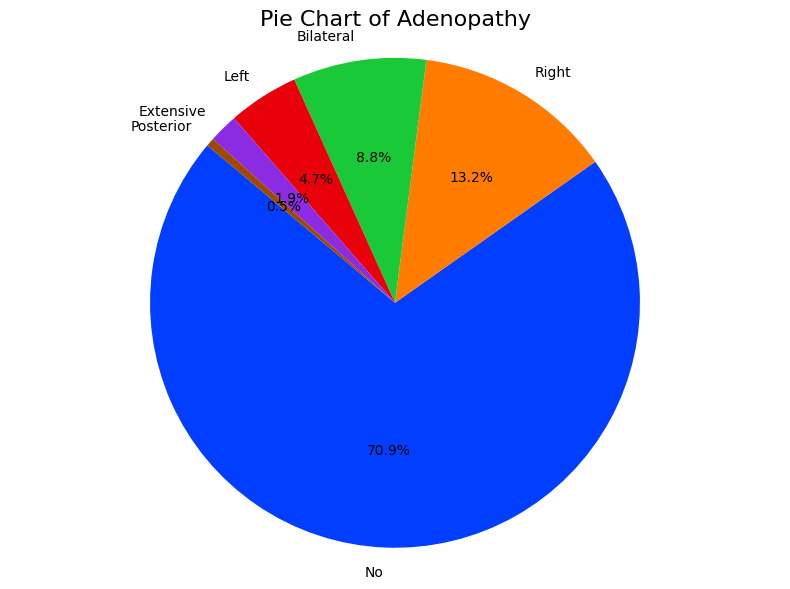

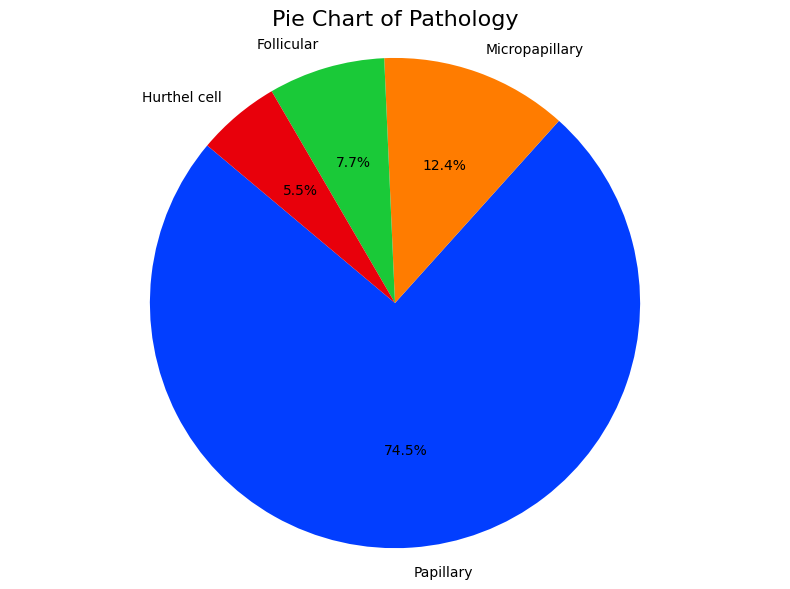

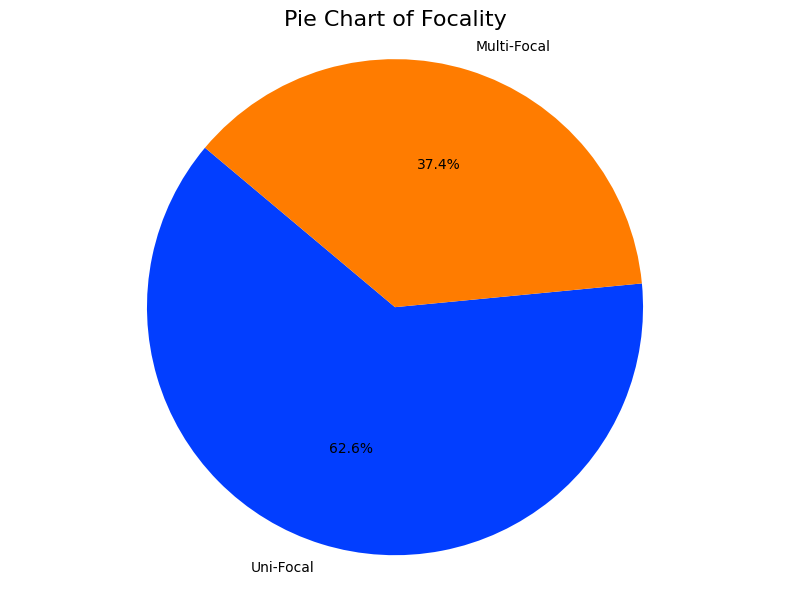

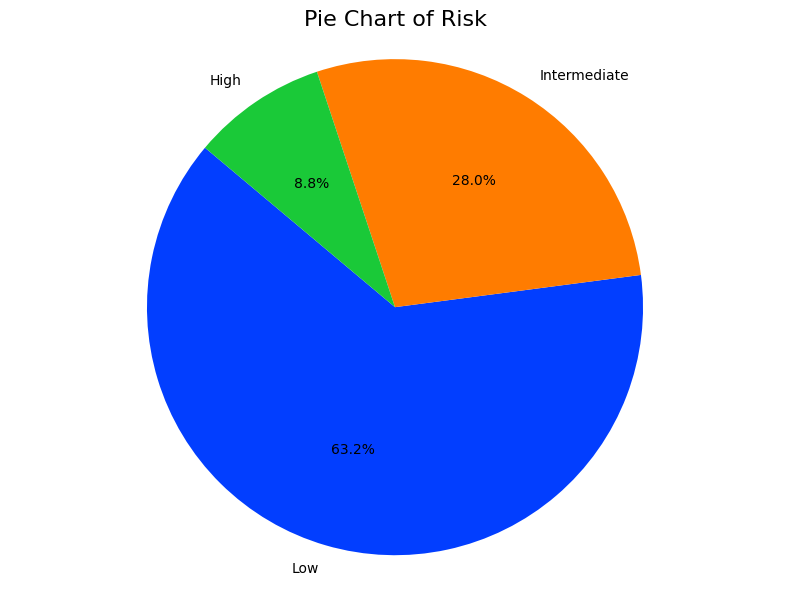

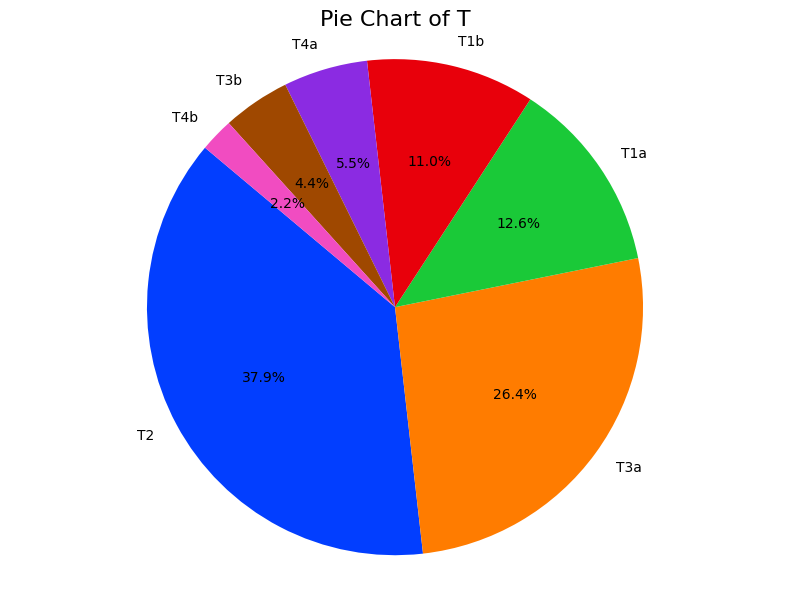

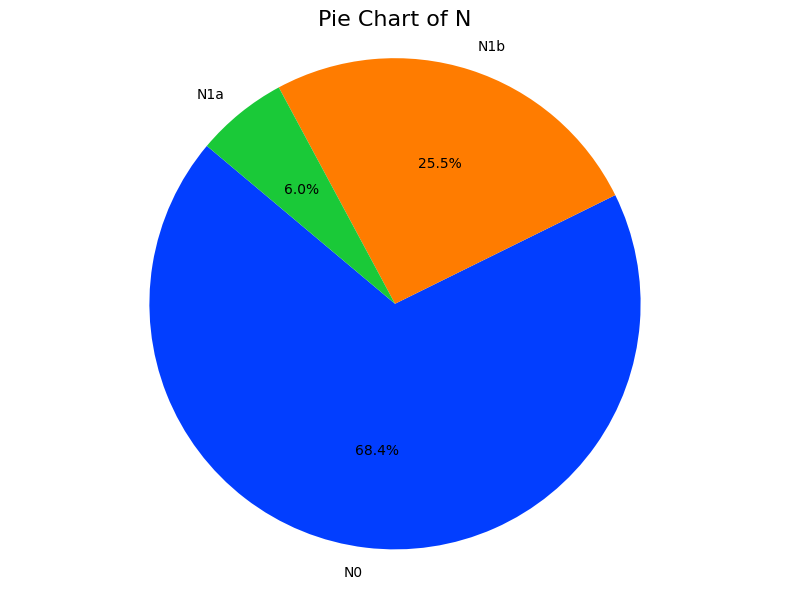

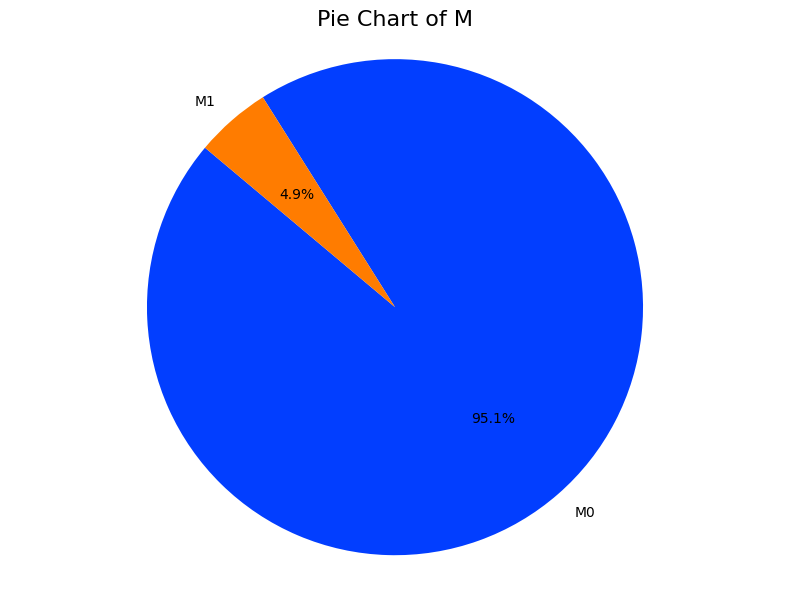

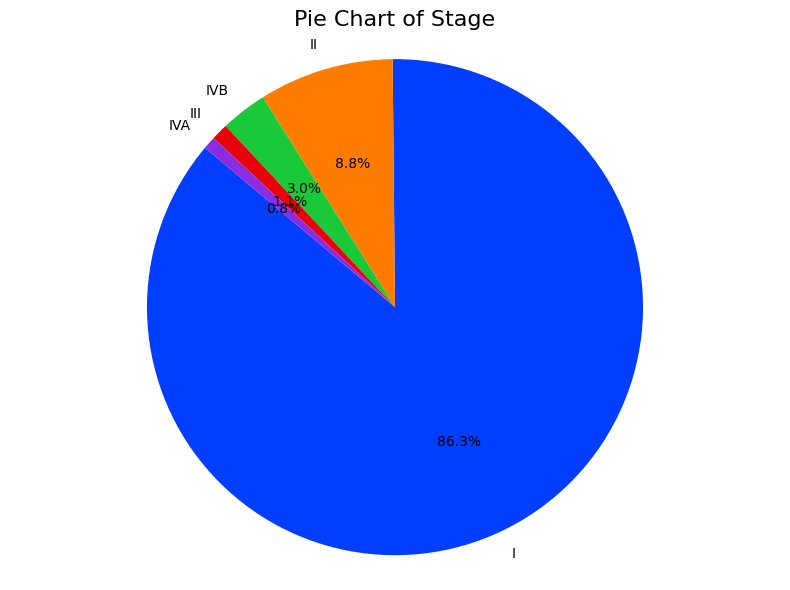

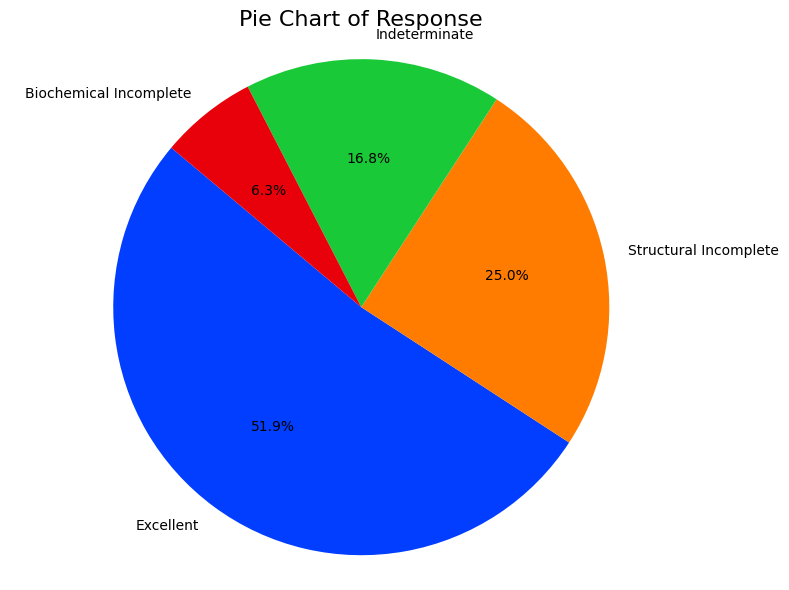

In [22]:
colors = sns.color_palette('bright')

for column in object_columns:
  plt.figure(figsize=(8,6))
  data = df[column].value_counts()
  plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors[:len(data)], startangle=140)
  plt.title(f'Pie Chart of {column}', fontsize=16)
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [23]:
df = pd.get_dummies(df, columns=object_columns)

In [24]:
df

,Age,Recurred,Age_log,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,No,3.332205,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
1,34,No,3.555348,True,False,True,False,False,True,True,...,False,True,False,False,False,False,False,True,False,False
2,30,No,3.433987,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
3,62,No,4.143135,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
4,62,No,4.143135,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,Yes,4.290459,False,True,False,True,False,True,False,...,True,False,False,False,False,True,True,False,False,False
379,81,Yes,4.406719,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,True
380,72,Yes,4.290459,False,True,False,True,False,True,True,...,True,False,False,False,False,True,False,False,False,True
381,61,Yes,4.127134,False,True,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
df['Recurred'] = label_encoder.fit_transform(df['Recurred'])

In [28]:
df

,Age,Recurred,Age_log,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,3.332205,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
1,34,0,3.555348,True,False,True,False,False,True,True,...,False,True,False,False,False,False,False,True,False,False
2,30,0,3.433987,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
3,62,0,4.143135,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
4,62,0,4.143135,True,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,4.290459,False,True,False,True,False,True,False,...,True,False,False,False,False,True,True,False,False,False
379,81,1,4.406719,False,True,False,True,True,False,False,...,True,False,False,False,False,True,False,False,False,True
380,72,1,4.290459,False,True,False,True,False,True,True,...,True,False,False,False,False,True,False,False,False,True
381,61,1,4.127134,False,True,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9452054794520548
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.88      0.95      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = dt_model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9315068493150684
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.84      0.95      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.94      0.92        73
weighted avg       0.94      0.93      0.93        73



In [40]:
from sklearn.svm import SVC

In [41]:
sv_model = SVC()
sv_model.fit(X_train, y_train)

SVC()

In [42]:
y_pred = sv_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7397260273972602
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        51
           1       0.80      0.18      0.30        22

    accuracy                           0.74        73
   macro avg       0.77      0.58      0.57        73
weighted avg       0.75      0.74      0.68        73



In [44]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [45]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
# random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf= rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}")




Random Forest Classifier:
Accuracy: 0.9726027397260274
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        51
           1       0.80      0.18      0.30        22

    accuracy                           0.74        73
   macro avg       0.77      0.58      0.57        73
weighted avg       0.75      0.74      0.68        73



In [47]:
# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{report_xgb}")



XGBoost Classifier:
Accuracy: 0.9452054794520548
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.88      0.95      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



In [48]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
print("\nNaive Bayes classifier:")
print(f"Accuacy : {accuracy_nb}")
print(f"classification report:\n{report_nb}")


Naive Bayes classifier:
Accuacy : 0.9315068493150684
classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.87      0.91      0.89        22

    accuracy                           0.93        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.93      0.93      0.93        73

